In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import mutual_info_score 

In [3]:
dataset = pd.read_csv('../Datasets/segments_df3.csv')

In [3]:
dataset.head()

,segment_id,5,6,7,8,9,10,11,12,13,...,20,21,osmid,lat_u,long_u,lat_v,long_v,length,oneway,highway
0,6.0,9.031554,21.230788,21.744715,19.745713,23.071177,22.623930,21.737810,23.953076,16.391942,...,25.204148,19.237010,23029696,12.970899,77.604800,12.971792,77.604417,107.589,True,secondary
1,7.0,26.329373,29.357695,28.056751,26.008101,15.333589,25.668937,25.195594,24.718064,21.424195,...,19.106476,20.537865,1096797091,12.970899,77.604800,12.971482,77.606075,152.569,True,primary
2,14.0,35.523494,39.565198,37.308207,33.337744,33.142641,32.586124,18.481723,16.774515,31.336257,...,30.966080,28.156422,1082927840,12.954895,77.605390,12.956376,77.605730,168.923,True,primary
3,18.0,40.558754,41.655356,38.950012,39.635068,37.390074,35.489191,27.584885,37.070346,34.073208,...,36.786090,37.596829,461556479,12.970613,77.506844,12.969862,77.506518,90.707,True,primary
4,37.0,30.267233,33.068947,29.489977,29.231499,28.309714,29.128734,28.655891,25.615735,23.805654,...,31.605211,24.275812,461556479,12.971730,77.507655,12.970613,77.506844,152.238,True,primary


# K MEANS

In [45]:
# perform clustering on the dataset using k-means algorithm

df = pd.DataFrame(dataset, columns=['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20','21'])

In [46]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(df)

C:\Users\CiSTUP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df['cluster'] = kmeans.labels_

In [48]:
# add cluster column to the dataset
dataset['cluster'] = kmeans.labels_

In [10]:
import folium

In [30]:
center_lat = dataset[['lat_u', 'lat_v']].mean()
center_long = dataset[['long_u', 'long_v']].mean()
mymap = folium.Map(location=[center_lat.mean(), center_long.mean()], zoom_start=13)

# Plot each segment on the map
for i, row in dataset.iterrows():
    # Choose a color based on the cluster assignment (assumes 4 clusters)
    if row['cluster'] == 0:
        color = 'blue'
    elif row['cluster'] == 1:
        color = 'green'
    elif row['cluster'] == 2:
        color = 'red'
    elif row['cluster'] == 3:
        color = 'purple'
    else:
        color = 'black'

    folium.PolyLine(locations=[[row['lat_u'], row['long_u']], [row['lat_v'], row['long_v']]], color=color).add_to(mymap)

# Save the map to an HTML file
mymap.save('map_segments.html')

In [13]:
df.cluster.value_counts()

cluster
0    1628
1    1282
3    1099
2     361
Name: count, dtype: int64

# KERNELISED PCA

In [22]:
from sklearn.decomposition import KernelPCA

In [89]:
df = pd.DataFrame(dataset, columns=['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20','21'])

In [42]:
# normalize the dataset and perform kernel PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kpca = KernelPCA(n_components=3, kernel='rbf')
df_pca = kpca.fit_transform(df_scaled)

# plot the first two principal components of the dataset


In [43]:
df_pca

array([[ 0.26641309, -0.21102061,  0.13576853],
       [ 0.15827164, -0.36832584,  0.1405167 ],
       [-0.40465167, -0.06411106, -0.12923335],
       ...,
       [-0.19953796, -0.39475496, -0.0225089 ],
       [-0.28333983, -0.31169352, -0.06051367],
       [ 0.36033002,  0.57460419, -0.45120024]])

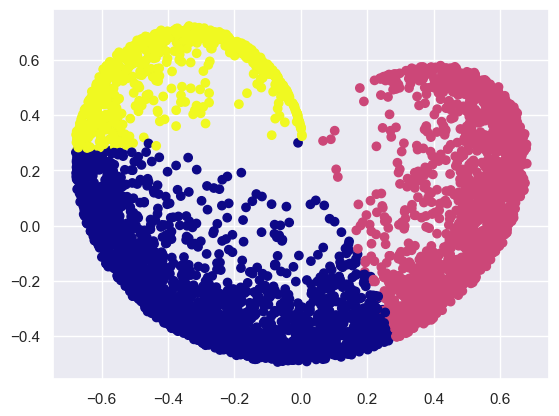

In [49]:
# plot 1st and 2nd principal components
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dataset['cluster'], cmap='plasma')

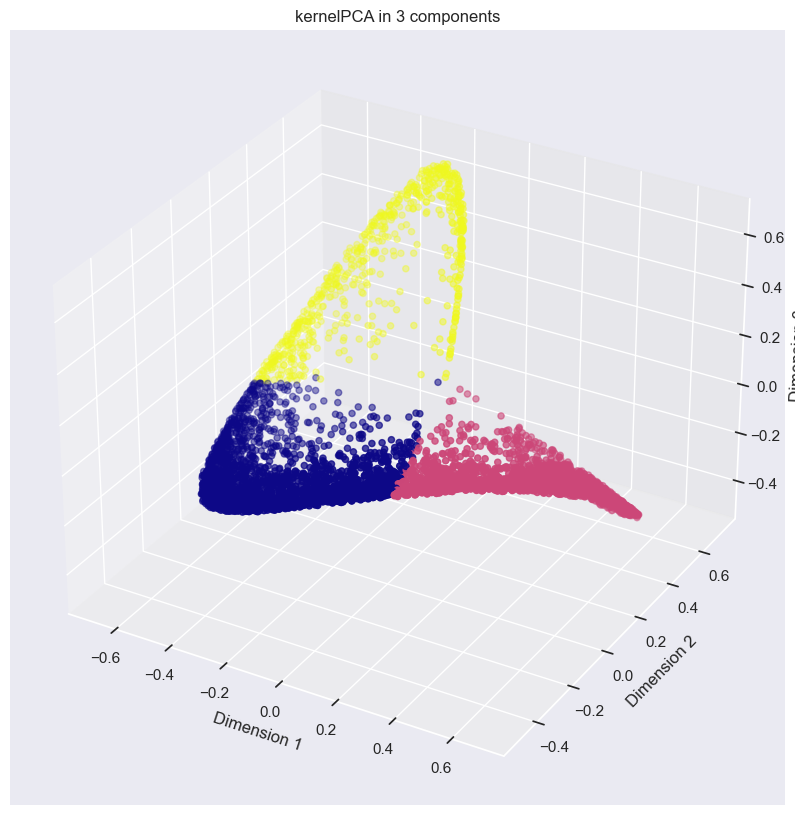

In [56]:
# Plot 3d graph
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=dataset['cluster'], cmap='plasma')
ax.set_title('kernelPCA in 3 components')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


In [57]:
# add 3 components to the dataset
dataset['kpca1'] = df_pca[:, 0]
dataset['kpca2'] = df_pca[:, 1]
dataset['kpca3'] = df_pca[:, 2]




In [91]:
# calculate the dunn index

from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# calculate the dunn index


def dunn_index(X, labels):
    """
    Dunn index for cluster validation (the bigger, the better)
    """
    try:
        unique_cluster_distances = np.unique(pairwise_distances(X[labels == i]) for i in np.unique(labels))
        max_diameter = max([np.max(distance) for distance in unique_cluster_distances])
        min_intercluster_distances = [np.min(pairwise_distances(X[labels == i], X[labels != i])) for i in np.unique(labels)]
        return min(min_intercluster_distances) / max_diameter
    except:
        return 0

In [90]:
# normalize the dataset and perform kernel PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [92]:
# dunn index of the dataset
dunn_index(df_scaled, dataset['cluster'])

0

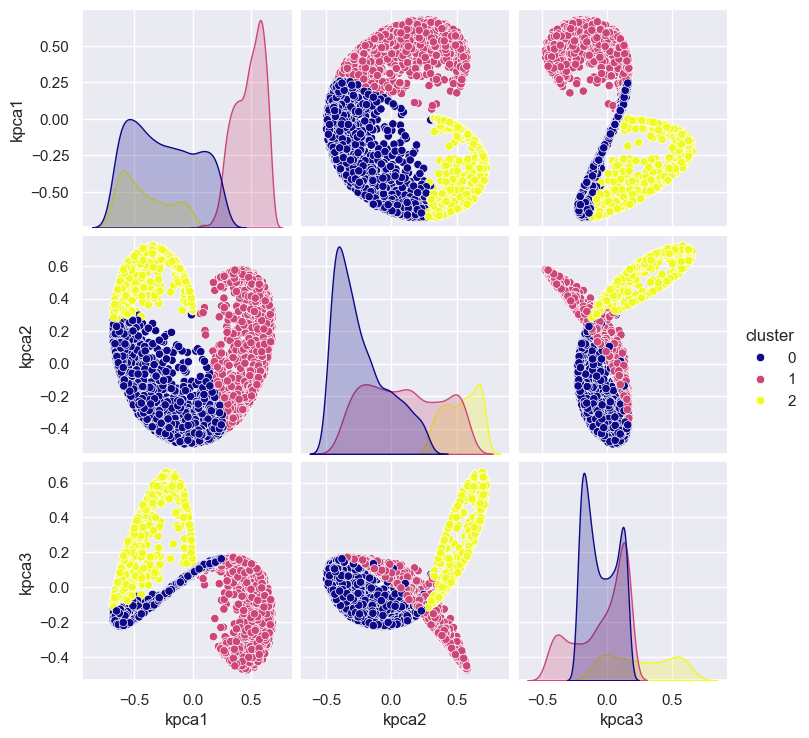

In [58]:
# plot kpca1, kpca2 and kpca3 against each other

sns.pairplot(dataset[['kpca1', 'kpca2', 'kpca3', 'cluster']], hue='cluster', palette='plasma')


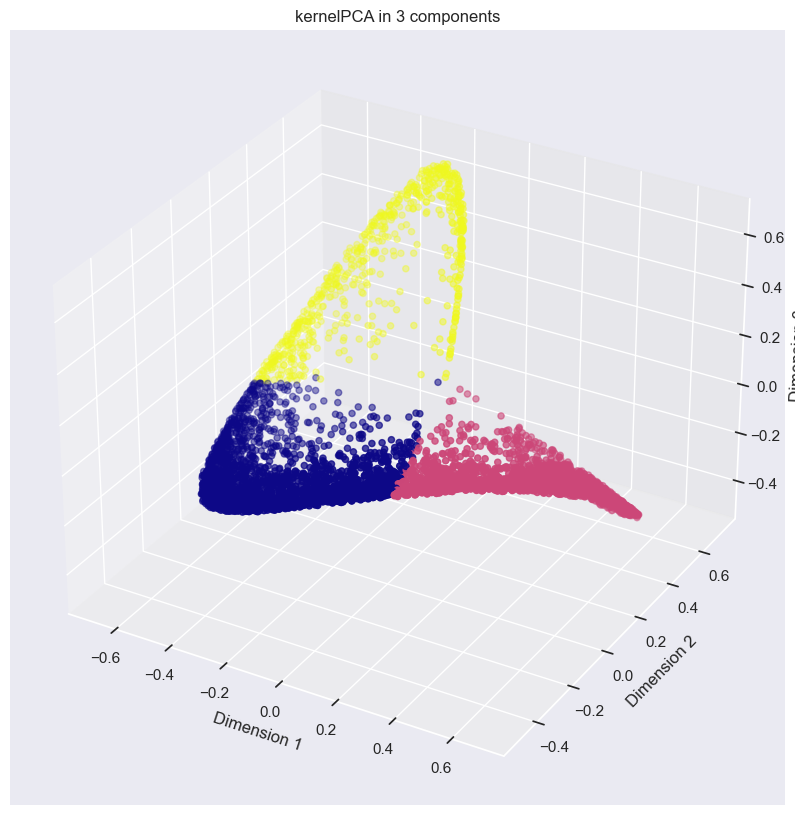

In [59]:
# plot 3d plot of kpca1, kpca2 and kpca3

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['kpca1'], dataset['kpca2'], dataset['kpca3'], c=dataset['cluster'], cmap='plasma')
ax.set_title('kernelPCA in 3 components')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


C:\Users\CiSTUP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


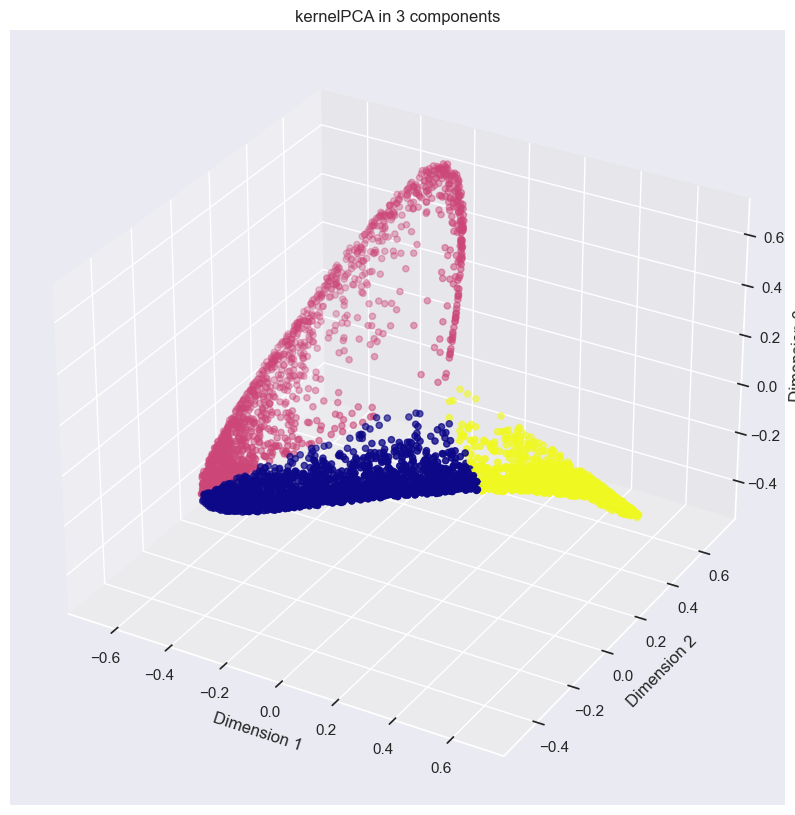

In [75]:
# cluster the dataset using k-means algorithm 

df = pd.DataFrame(dataset, columns=['kpca1','kpca2','kpca3'])

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(df)

df['cluster_kpca'] = kmeans.labels_

# add cluster column to the dataset
dataset['cluster_kpca'] = kmeans.labels_

# plot 3d plot of kpca1, kpca2 and kpca3

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['kpca1'], dataset['kpca2'], dataset['kpca3'], c=dataset['cluster_kpca'], cmap='plasma')
ax.set_title('kernelPCA in 3 components')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()



In [74]:
from sklearn.metrics import silhouette_score

# calculate silhouette score for k-means clustering
silhouette_score(df.loc[:,['kpca1']], kmeans.labels_)
# calculate silhouette score for k-means clu

0.6318014047880525

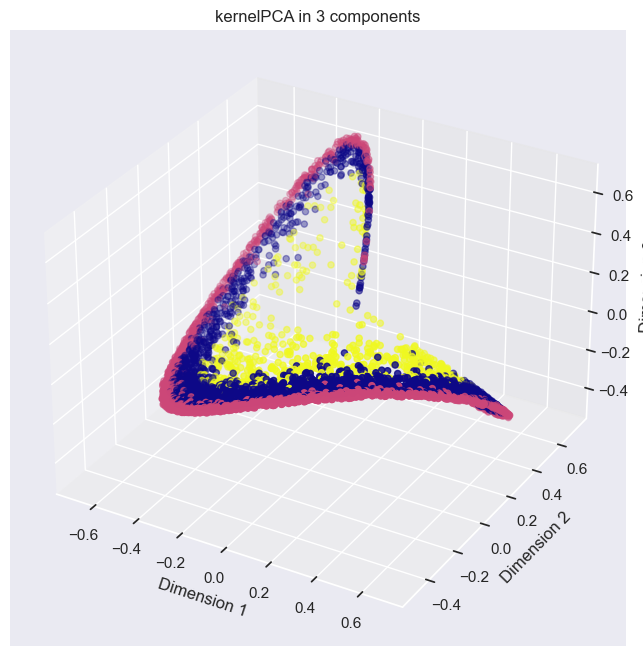

In [67]:
# plot 3d plot of kpca1, kpca2 and kpca3 with gmm clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['kpca1'], dataset['kpca2'], dataset['kpca3'], c=dataset['cluster_gmm'], cmap='plasma')
ax.set_title('kernelPCA in 3 components')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


In [64]:
# use gmm to cluster the dataset

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full').fit(df_scaled)
labels = gmm.predict(df_scaled)
dataset['cluster_gmm'] = labels


In [65]:
dataset['cluster_gmm'].value_counts()

cluster_gmm
0    2190
1    1626
2     554
Name: count, dtype: int64

In [63]:
dataset['cluster'].value_counts()

cluster
0    2107
1    1622
2     641
Name: count, dtype: int64

In [60]:
df = pd.DataFrame(dataset, columns=['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20','21'])

In [61]:
# scale the df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

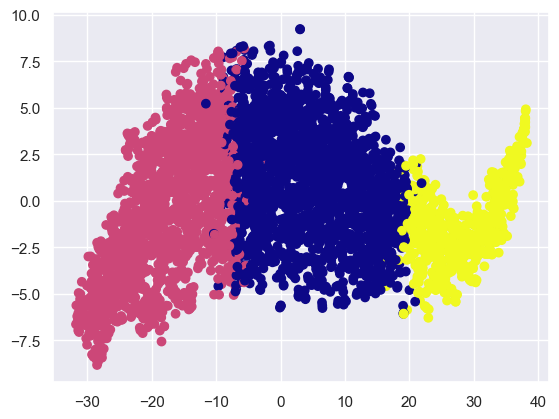

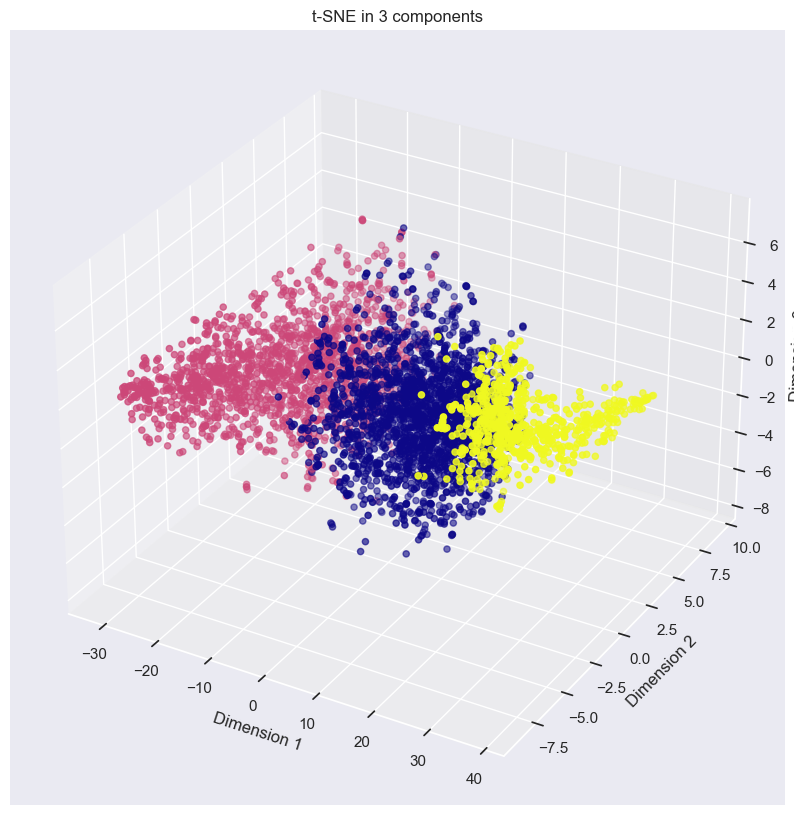

In [62]:
#  dimension reduction using manifold learning

from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

# perform t-SNE on the dataset
tsne = TSNE(n_components=3, perplexity=50)
df_tsne = tsne.fit_transform(df_scaled)

# plot the first two principal components of the dataset
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=dataset['cluster'], cmap='plasma')

# Plot 3d graph
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_tsne[:, 0], df_tsne[:, 1], df_tsne[:, 2], c=dataset['cluster'], cmap='plasma')
ax.set_title('t-SNE in 3 components')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()




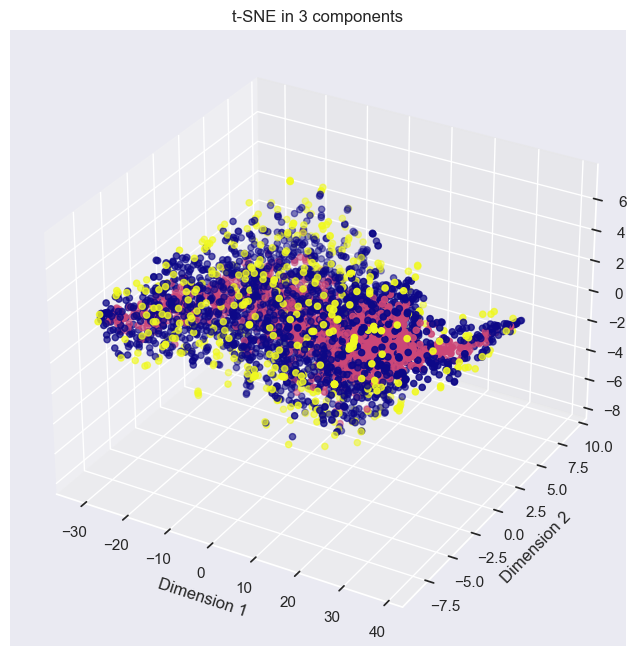

In [66]:
# plot 3d plot of t-SNE with gmm clustering

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_tsne[:, 0], df_tsne[:, 1], df_tsne[:, 2], c=dataset['cluster_gmm'], cmap='plasma')
ax.set_title('t-SNE in 3 components')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()




In [ ]:
total_distance = np.sum(kpca.kernel_pca_.K)
explained_variance_ratio = kpca.lambdas_ / total_distance
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

In [ ]:
# explain the variance of the dataset 
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
# perform clustering on the dataset using k-means algorithm

In [ ]:
eigenvalues = pca.lambdas_

In [ ]:
# Plot the explained variance ratio
explained_variance_ratio = pca.lambdas_ / sum(pca.lambdas_)
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

In [ ]:
# plot the variance explained by each principal component
plt.bar(range(1, 17), pca.lambdas_ / sum(pca.lambdas_))

# pca 

In [33]:
sns.set()

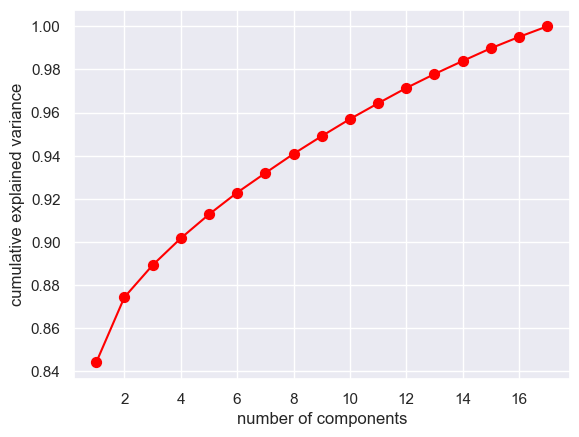

In [34]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=17)
df_pca = pca.fit_transform(df_scaled)

# plot the variance explained by each principal component
# plt.bar(range(1, 18), pca.explained_variance_ratio_)
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), c='red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# draw the marker points at the cumulative variance explained by each principal component
plt.scatter(range(1, 18), pca.explained_variance_ratio_.cumsum(), c='red', s=50)
plt.show()



# plot the first two principal components of the dataset
# plt.scatter(df_pca[:, 0], df_pca[:, 1])



# DIMENSION REDUCTION USING PCA AND THEN CLUSTERING USING K-MEANS

In [18]:
sns.set(style="ticks", color_codes=True)

In [ ]:
# apply pca to reduce the dimensionality of the dataset and check the variance explained by each principal component
pca = PCA(n_components=17)
pca.fit(df)
pca.explained_variance_ratio_

# plot the variance explained by each principal component
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [14]:
df.columns

Index(['mds_1', 'mds_2', 'mds_3', 'cluster'], dtype='object')

In [15]:
# take the first 9 principal components and add them to the dataset
pca = PCA(n_components=9)
df = pd.DataFrame(dataset, columns=['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','17','18','19','20','21'])
pca.fit(df)

df_pca = pca.transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9'])
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-15.473656,-16.651047,-3.161557,2.832936,-8.215601,1.776884,0.684768,-4.590691,-0.760501
1,-9.040791,2.254439,-3.330334,0.708325,0.580123,3.916998,2.222813,-3.238598,2.584827
2,17.046650,11.321900,1.258197,3.887795,-6.074373,-12.243431,3.985774,0.778261,-5.102718
3,46.470090,2.389343,3.262621,2.051085,-2.832359,0.536081,2.153362,-5.269811,-2.728888
4,15.442949,-3.040370,0.491708,-3.397867,-6.185899,-0.228919,1.472959,-1.146980,4.007281


In [16]:
# add these principal components to the dataset
dataset['PC1'] = df_pca['PC1']
dataset['PC2'] = df_pca['PC2']
dataset['PC3'] = df_pca['PC3']
dataset['PC4'] = df_pca['PC4']
dataset['PC5'] = df_pca['PC5']
dataset['PC6'] = df_pca['PC6']
dataset['PC7'] = df_pca['PC7']
dataset['PC8'] = df_pca['PC8']
dataset['PC9'] = df_pca['PC9']

# perform clustering on the dataset using k-means algorithm
df = pd.DataFrame(dataset, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9'])
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(df)

df['cluster'] = kmeans.labels_

# add cluster column to the dataset
dataset['cluster_pca'] = kmeans.labels_




C:\Users\CiSTUP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
center_lat = dataset[['lat_u', 'lat_v']].mean()
center_long = dataset[['long_u', 'long_v']].mean()
mymap = folium.Map(location=[center_lat.mean(), center_long.mean()], zoom_start=13)

# Plot each segment on the map
for i, row in dataset.iterrows():
    # Choose a color based on the cluster assignment (assumes 4 clusters)
    if row['cluster_pca'] == 0:
        color = 'blue'
    elif row['cluster_pca'] == 1:
        color = 'green'
    elif row['cluster_pca'] == 2:
        color = 'red'
    elif row['cluster_pca'] == 3:
        color = 'purple'
    else:
        color = 'black'

    folium.PolyLine(locations=[[row['lat_u'], row['long_u']], [row['lat_v'], row['long_v']]], color=color).add_to(mymap)

# Save the map to an HTML file
mymap.save('map_segments_pca.html')

# MDS AND CLUSTERING

In [5]:
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\CiSTUP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


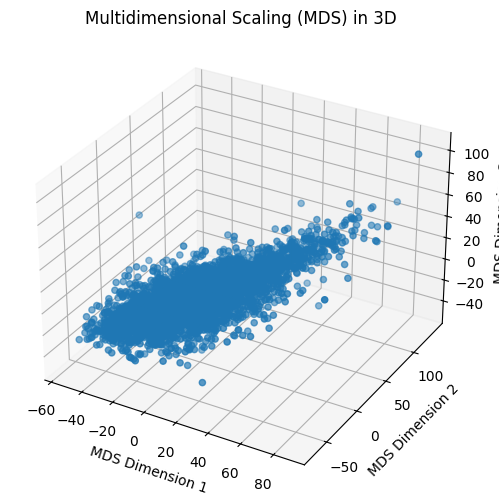

In [40]:
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting


# Specify the number of dimensions for the MDS output
n_components = 3

# Create an MDS instance with three components
mds = MDS(n_components=n_components)

# Fit and transform the data using MDS
X_mds = mds.fit_transform(df)

# Visualize the MDS result in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds[:, 0], X_mds[:, 1], X_mds[:, 2])
ax.set_title('Multidimensional Scaling (MDS) in 3D')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.show()


In [ ]:
# plot mds stress
stress = []
for i in range(1, 17):
    mds = MDS(n_components=i)
    X_mds = mds.fit_transform(df)
    stress.append(mds.stress_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 17), stress)
plt.xlabel('Number of components')
plt.ylabel('Stress')
plt.show()



C:\Users\CiSTUP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


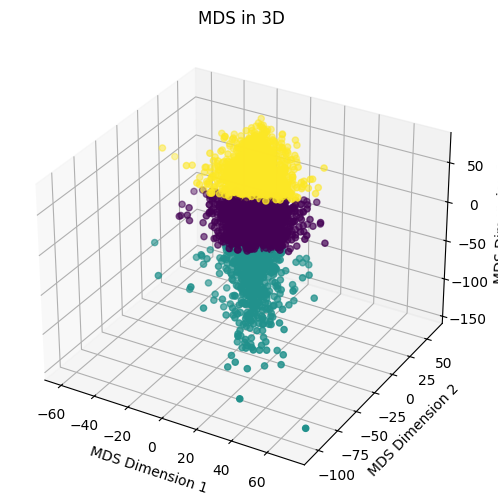

In [9]:
# reduce the dimensionality of the dataset using mds and plot the clusters
mds = MDS(n_components=3)
X_mds = mds.fit_transform(df)

# plot the clusters for 3 components using 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds[:, 0], X_mds[:, 1], X_mds[:, 2], c=df['cluster'])
ax.set_title('MDS in 3D')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
plt.show()




In [10]:
# add mds components to the dataset and perform k means clustering
dataset['mds_1'] = X_mds[:, 0]
dataset['mds_2'] = X_mds[:, 1]
dataset['mds_3'] = X_mds[:, 2]

df = pd.DataFrame(dataset, columns=['mds_1', 'mds_2', 'mds_3'])

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(df)

df['cluster'] = kmeans.labels_

# add cluster column to the dataset
dataset['cluster_mds'] = kmeans.labels_

C:\Users\CiSTUP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
import folium

In [13]:
center_lat = dataset[['lat_u', 'lat_v']].mean()
center_long = dataset[['long_u', 'long_v']].mean()
mymap = folium.Map(location=[center_lat.mean(), center_long.mean()], zoom_start=13)

# Plot each segment on the map
for i, row in dataset.iterrows():
    # Choose a color based on the cluster assignment (assumes 4 clusters)
    if row['cluster_mds'] == 0:
        color = 'blue'
    elif row['cluster_mds'] == 1:
        color = 'green'
    elif row['cluster_mds'] == 2:
        color = 'red'
    elif row['cluster_mds'] == 3:
        color = 'purple'
    else:
        color = 'black'

    folium.PolyLine(locations=[[row['lat_u'], row['long_u']], [row['lat_v'], row['long_v']]], color=color).add_to(mymap)

# Save the map to an HTML file
mymap.save('map_segments_mds.html')

In [37]:
df.drop(['cluster'], axis=1, inplace=True)


In [ ]:
df.drop(['cluster_hierarchial'], axis=1, inplace=True)

In [35]:
df.columns

Index(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', 'cluster'],
      dtype='object')

In [76]:
dataset.columns

Index(['segment_id', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', 'osmid', 'lat_u', 'long_u',
       'lat_v', 'long_v', 'length', 'oneway', 'highway', 'mds_1', 'mds_2',
       'mds_3', 'cluster_mds', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
       'PC8', 'PC9', 'cluster_pca', 'cluster', 'kpca1', 'kpca2', 'kpca3',
       'cluster_gmm', 'cluster_kpca'],
      dtype='object')

In [77]:
dataset.oneway.value_counts()

oneway
True     3350
False    1020
Name: count, dtype: int64

In [78]:
dataset.highway.value_counts()

highway
primary                            1782
secondary                          1173
trunk                               605
tertiary                            541
residential                          90
primary_link                         46
motorway                             44
trunk_link                           38
secondary_link                       13
['primary_link', 'primary']           7
unclassified                          5
tertiary_link                         4
motorway_link                         4
['trunk', 'trunk_link']               4
['trunk', 'primary']                  3
['secondary', 'primary']              3
['tertiary', 'motorway_link']         2
['residential', 'tertiary']           2
['trunk', 'tertiary']                 1
living_street                         1
['motorway', 'motorway_link']         1
['secondary', 'secondary_link']       1
Name: count, dtype: int64

In [79]:
# calculate the  distribution of highway and oneway in each cluster
dataset.groupby(['cluster', 'highway']).size()

cluster  highway                        
0        ['primary_link', 'primary']          3
         ['residential', 'tertiary']          1
         ['secondary', 'primary']             1
         ['tertiary', 'motorway_link']        2
         ['trunk', 'primary']                 2
         ['trunk', 'tertiary']                1
         ['trunk', 'trunk_link']              1
         motorway                            19
         motorway_link                        2
         primary                            907
         primary_link                        24
         residential                         29
         secondary                          568
         secondary_link                       9
         tertiary                           208
         tertiary_link                        1
         trunk                              304
         trunk_link                          21
         unclassified                         4
1        ['motorway', 'motorway_link']        1

<Axes: xlabel='cluster'>

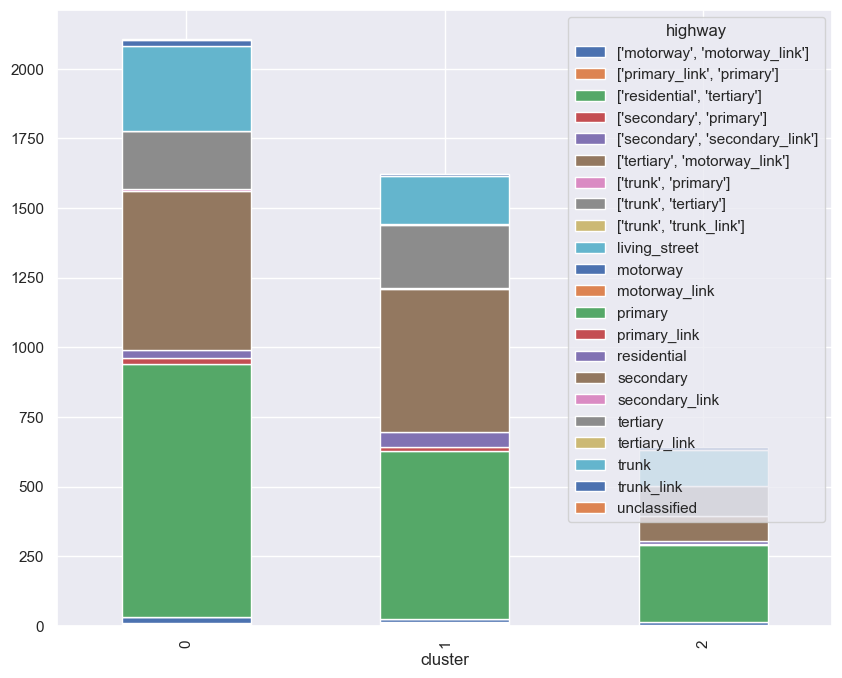

In [80]:
# plot bar graph of highway and oneway in each cluster
dataset.groupby(['cluster', 'highway']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))

In [ ]:
# calculate the  distribution of length in each cluster
dataset.groupby(['cluster', 'length']).size()



# plot bar graph of length in each cluster
dataset.groupby(['cluster', 'length']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))

# calculate the  distribution of oneway in each cluster
dataset.groupby(['cluster', 'oneway']).size()

# plot bar graph of oneway in each cluster
dataset.groupby(['cluster', 'oneway']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))



# plot bar graph of oneway in each cluster


In [82]:
# distribution of  length in datasset 
dataset.length.value_counts()

# plot bar graph of length in each cluster
dataset.groupby(['cluster', 'length']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))

length
107.589    2
237.613    2
206.169    2
98.210     2
185.058    2
          ..
129.178    1
79.571     1
54.429     1
40.378     1
775.730    1
Name: count, Length: 4347, dtype: int64

In [84]:
# make histogram of length
dataset.length.max()

9626.725000000002

C:\Users\CiSTUP\AppData\Local\Temp\ipykernel_18724\1281094802.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby(['cluster', 'length_bins']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))


<Axes: xlabel='cluster'>

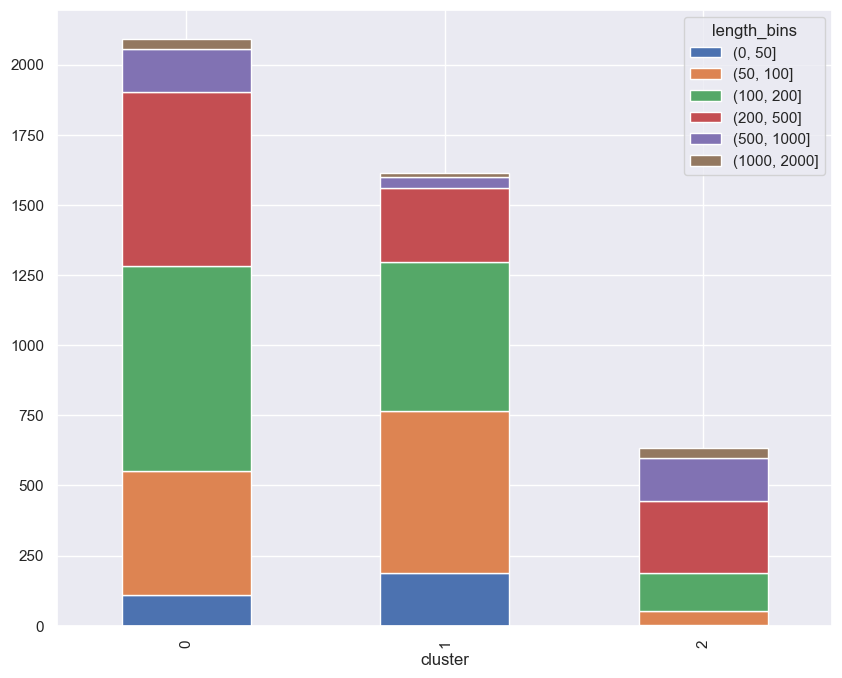

In [86]:
# break length into 0-50,50-100,100-200,200-500,500-1000,1000-2000,2000-5000,5000-10000
bins = [0, 50, 100, 200, 500, 1000, 2000]
dataset['length_bins'] = pd.cut(dataset['length'], bins)

# plot bar graph of length in each cluster
dataset.groupby(['cluster', 'length_bins']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))


In [ ]:
dataset.groupby(['cluster', 'oneway']).size()

# plot bar graph of oneway in each cluster
dataset.groupby(['cluster', 'oneway']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))